In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import altair
import pandas as pd
import numpy as np
import networkx as nx
import scipy
import re
import plotly.express as px
from io import StringIO
from copy import deepcopy
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


In [74]:
raw_health = pd.read_csv('features_health-1.csv', index_col=0)
raw_nonhealth = pd.read_csv('features_nonhealth_1.csv', index_col=0)

In [75]:
coln_health = list(raw_health)

for i in coln_health:
    raw_health = raw_health[~raw_health[i].isin(['..'])]
raw_health = raw_health.dropna()
raw_health = raw_health.iloc[:,1:]
raw_health = pd.DataFrame(raw_health, dtype=np.float)


In [76]:
coln_nonhealth = list(raw_nonhealth)

for i in coln_nonhealth:
    raw_nonhealth = raw_nonhealth[~raw_nonhealth[i].isin(['..'])]
raw_nonhealth = raw_nonhealth.dropna()
raw_nonhealth = raw_nonhealth.iloc[:,1:]
raw_nonhealth = pd.DataFrame(raw_nonhealth, dtype=np.float)


In [77]:
raw_health.shape

(265, 16)

In [78]:
raw_nonhealth.shape

(401, 15)

In [79]:
raw_health.head()

,%mental,"mental admission/100,000(18-19)",%poor SA-heath,%psycho,%high BP,%overweight,%smoker,%alcohol,%exercise,"self-harm rate/100,000","IMR/1,000",%HSV,%asthma,%COPD,%arthritis,%osteoporosis
Code (PHN/LGA),,,,,,,,,,,,,,,,
PHN101,17.5,516.8,12.4,10.4,22.8,35.3,12.3,14.3,62.0,8.5,3.0,4.4,8.2,2.0,12.5,4.6
11100,16.0,469.1,13.6,10.8,23.2,35.3,14.6,11.3,68.4,9.6,3.6,4.8,7.6,2.0,12.3,3.3
11300,15.5,503.9,12.3,11.1,23.9,34.5,12.3,10.1,66.7,7.9,3.3,4.6,6.9,1.8,12.2,5.2
11520,16.9,510.6,10.7,8.6,23.0,35.2,9.9,13.8,60.0,6.8,2.2,4.6,7.2,1.6,12.4,4.8
11570a,15.2,670.0,18.8,15.4,23.3,34.6,15.0,9.1,73.6,7.1,2.5,5.0,8.6,2.0,15.0,4.8


In [81]:
raw_nonhealth.iloc[:,0] = raw_nonhealth.iloc[:,0] / 100
raw_nonhealth.head()

,"Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000",% labour force participation,% private dwellings where Internet accessed,% persons living in crowded dwellings,Total fertility rate,% Permanent migrants under the Family stream visa\n(total),Aboriginal population as proportion of total population (%),% households in dwellings receiving rent assistance,% persons living in social housing,% mortgage stress,% rental stress,% Low income households,% people receiving an unemployment benefit,% disability support pensioners,% unemployed
Code (PHN/LGA),,,,,,,,,,,,,,,
11100,17.735,67.6,81.9,17.3,1.52,5.2,2.1,13.2,5.7,9.8,25.2,36.2,4.6,2.9,3.1
11300,21.541,62.9,84.1,21.7,1.12,6.4,0.5,13.9,2.4,13.8,33.2,39.5,3.8,2.2,3.8
11520,26.733,68.9,87.5,10.7,1.48,4.2,0.6,7.4,1.8,8.7,20.1,27.0,2.6,1.7,2.0
12930,15.623,63.9,85.4,14.8,1.47,6.9,0.6,13.2,2.1,12.8,29.4,36.8,4.2,2.4,3.1
14170,28.404,76.0,86.8,10.8,1.32,4.0,1.4,13.6,2.7,4.7,16.8,23.7,4.4,2.7,3.7


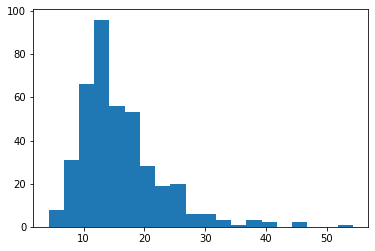

In [82]:
raw_nonhealth.head()
_ = plt.hist(raw_nonhealth.iloc[:,0], bins=20)

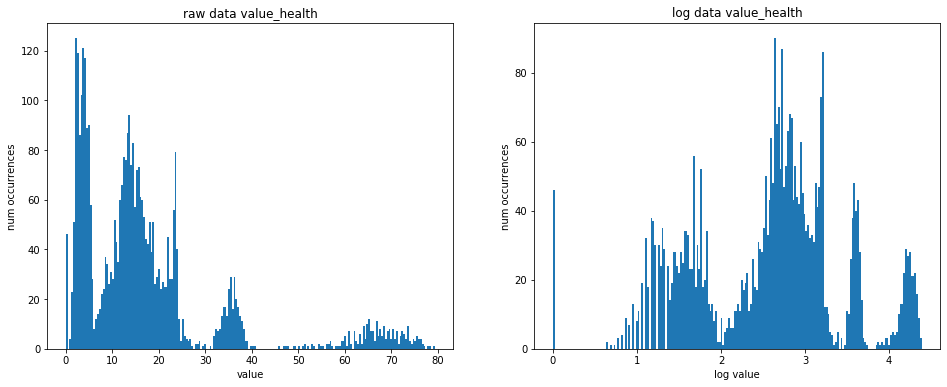

,%poor SA-heath,%psycho,%high BP,%overweight,%smoker,%alcohol,%exercise,"self-harm rate/100,000","IMR/1,000",%HSV,%asthma,%COPD,%arthritis,%osteoporosis
Code (PHN/LGA),,,,,,,,,,,,,,
PHN101,12.4,10.4,22.8,35.3,12.3,14.3,62.0,8.5,3.0,4.4,8.2,2.0,12.5,4.6
11100,13.6,10.8,23.2,35.3,14.6,11.3,68.4,9.6,3.6,4.8,7.6,2.0,12.3,3.3
11300,12.3,11.1,23.9,34.5,12.3,10.1,66.7,7.9,3.3,4.6,6.9,1.8,12.2,5.2
11520,10.7,8.6,23.0,35.2,9.9,13.8,60.0,6.8,2.2,4.6,7.2,1.6,12.4,4.8
11570a,18.8,15.4,23.3,34.6,15.0,9.1,73.6,7.1,2.5,5.0,8.6,2.0,15.0,4.8


In [83]:
# for health-relevant data
health_feature = raw_health.iloc[:,2:]
log_data_health = np.log(health_feature + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.hist(health_feature.values.flatten(), bins=200)
ax1.set_title('raw data value_health')
ax1.set_xlabel('value')
ax1.set_ylabel('num occurrences')
ax2.hist(log_data_health.values.flatten(), bins=200)
ax2.set_title('log data value_health')
ax2.set_xlabel('log value')
ax2.set_ylabel('num occurrences')
plt.show()

health_feature.head()

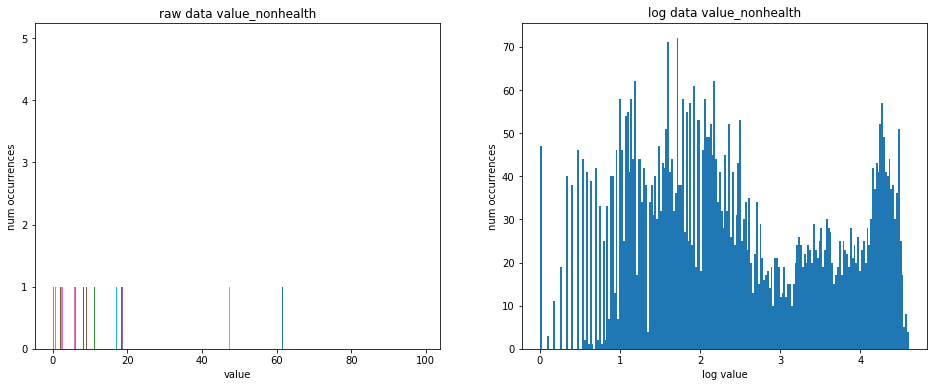

,% labour force participation,% private dwellings where Internet accessed,% persons living in crowded dwellings,Total fertility rate,% Permanent migrants under the Family stream visa\n(total),Aboriginal population as proportion of total population (%),% households in dwellings receiving rent assistance,% persons living in social housing,% mortgage stress,% rental stress,% Low income households,% people receiving an unemployment benefit,% disability support pensioners,% unemployed
Code (PHN/LGA),,,,,,,,,,,,,,
11100,67.6,81.9,17.3,1.52,5.2,2.1,13.2,5.7,9.8,25.2,36.2,4.6,2.9,3.1
11300,62.9,84.1,21.7,1.12,6.4,0.5,13.9,2.4,13.8,33.2,39.5,3.8,2.2,3.8
11520,68.9,87.5,10.7,1.48,4.2,0.6,7.4,1.8,8.7,20.1,27.0,2.6,1.7,2.0
12930,63.9,85.4,14.8,1.47,6.9,0.6,13.2,2.1,12.8,29.4,36.8,4.2,2.4,3.1
14170,76.0,86.8,10.8,1.32,4.0,1.4,13.6,2.7,4.7,16.8,23.7,4.4,2.7,3.7


In [85]:
# for nonhealth-relevant data
nonhealth_feature = raw_nonhealth.iloc[:,1:]
log_data_nonhealth = np.log(nonhealth_feature + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.hist(nonhealth_feature, bins=200)
ax1.set_title('raw data value_nonhealth')
ax1.set_xlabel('value')
ax1.set_ylabel('num occurrences')
ax2.hist(log_data_nonhealth.values.flatten(), bins=200)
ax2.set_title('log data value_nonhealth')
ax2.set_xlabel('log value')
ax2.set_ylabel('num occurrences')
plt.show()

nonhealth_feature.head()

In [63]:
# for health
pca = PCA()
health_pca = pca.fit_transform(log_data_health.to_numpy())
var = 0
n = 0
# increase the value of n by 1, stop until n explaining 90% of the variance
while var < 0.9:
    var += pca.explained_variance_ratio_[n]
    n += 1
# update PCA with the correct number of components, namely, 'n' explaining 90% of the variance
pca = PCA(n_components = n)
health_pca = pca.fit_transform(log_data_health.to_numpy())
health_pca_3_4 = np.delete(health_pca, np.s_[:2], 1)
print(n)
print(f'\nVariance ratio: {pca.explained_variance_ratio_}')
print(f'\nExplained variance: {pca.explained_variance_}')
print(f'\nExplained variance: {np.shape(health_pca)}')

4

Variance ratio: [0.46808219 0.23758043 0.14717495 0.06996474]

Explained variance: [0.49459636 0.251038   0.15551156 0.07392784]

Explained variance: (265, 4)


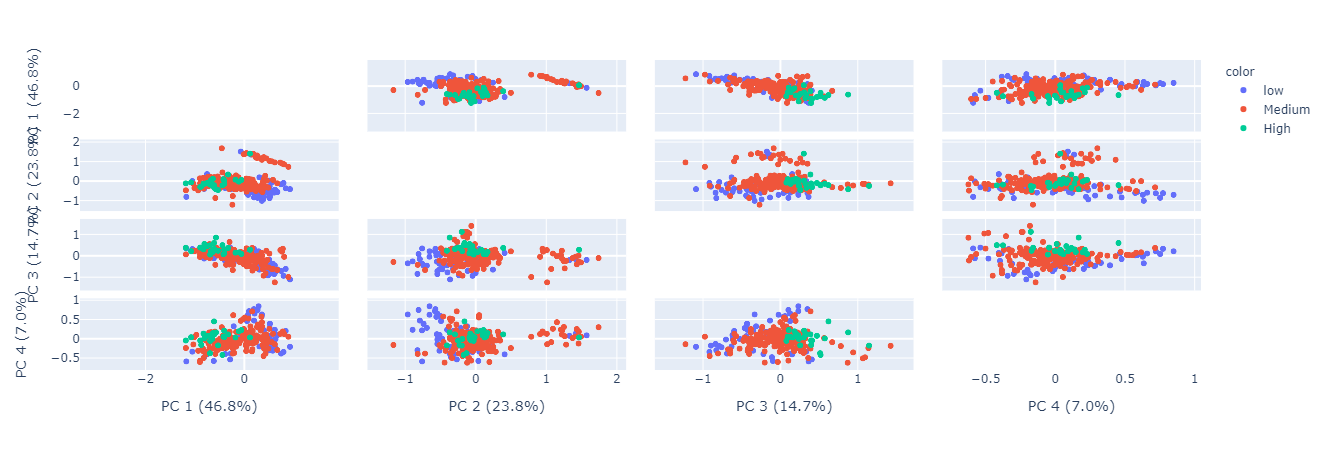

In [69]:
#PCA plotting for health_all
y = raw_health.iloc[:,0]
rate_label = []
low_rate = y.quantile(0.20)
medium_rate = y.quantile(0.90)
for i in y:
    if i <= low_rate:
        rate_label.append("low")
    if i <= medium_rate and i > low_rate:
        rate_label.append("Medium")    
    if i > medium_rate:
        rate_label.append("High")

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    health_pca,
    labels=labels,
    dimensions=range(4),
    color = rate_label
)
fig.update_traces(diagonal_visible=False)
fig.show()



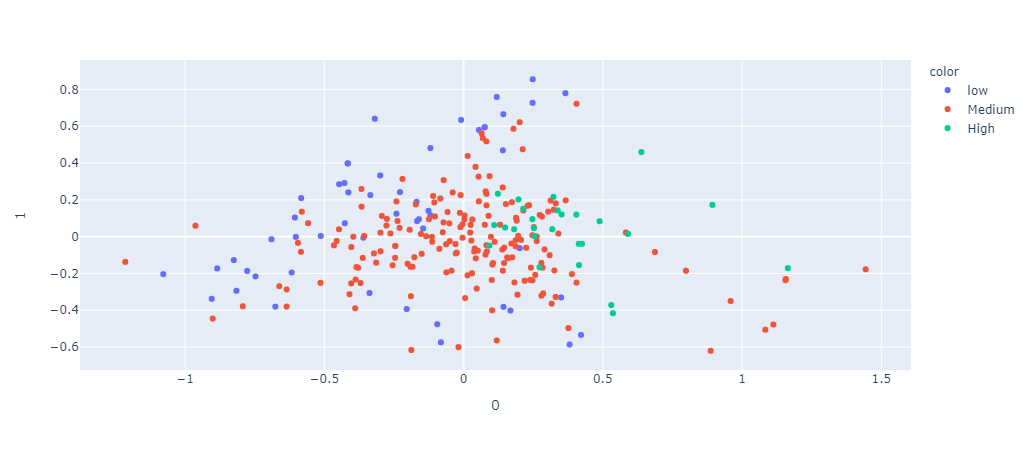

In [71]:
fig = px.scatter(health_pca_3_4, x=0, y=1, color=rate_label)
fig.show()

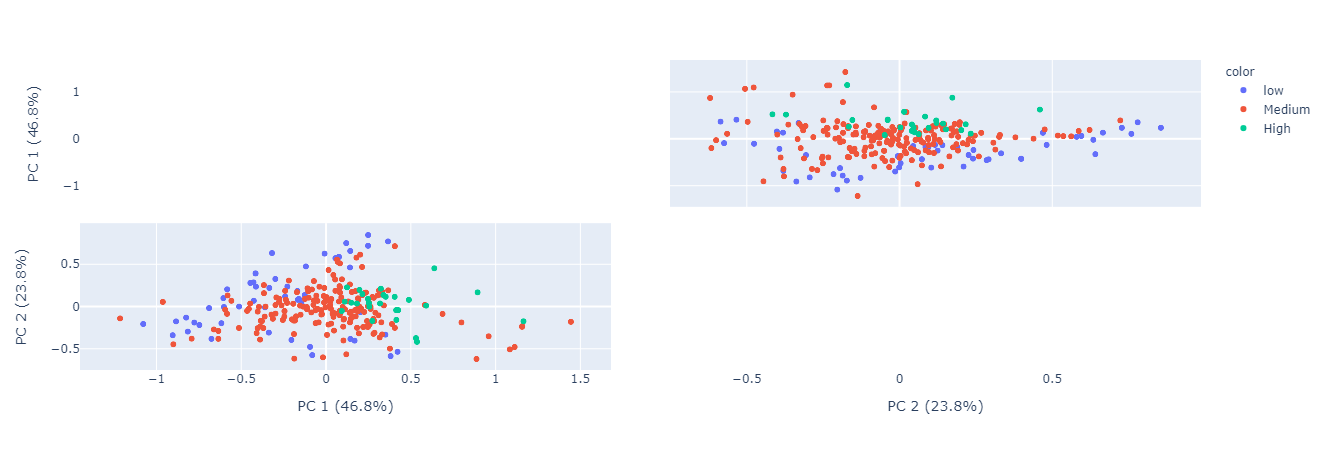

In [70]:
# for health_PC3_PC4
labels_3_4 = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    health_pca_3_4,
    labels=labels,
    dimensions=range(2),
    color = rate_label
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [86]:
# for non-health
pca2 = PCA()
nonhealth_pca = pca2.fit_transform(log_data_nonhealth.to_numpy())
var = 0
n = 0
# increase the value of n by 1, stop until n explaining 90% of the variance
while var < 0.9:
    var += pca2.explained_variance_ratio_[n]
    n += 1
# update PCA with the correct number of components, namely, 'n' explaining 90% of the variance
pca2 = PCA(n_components = n)
nonhealth_pca = pca2.fit_transform(log_data_nonhealth.to_numpy())

print(n)
print(f'\nVariance ratio: {pca2.explained_variance_ratio_}')
print(f'\nExplained variance: {pca2.explained_variance_}')
print(f'\nExplained variance: {np.shape(pca2.components_)}')

5

Variance ratio: [0.58235935 0.16001443 0.08387178 0.0434097  0.03035711]

Explained variance: [2.53496313 0.69652987 0.36508709 0.1889589  0.13214205]

Explained variance: (5, 14)


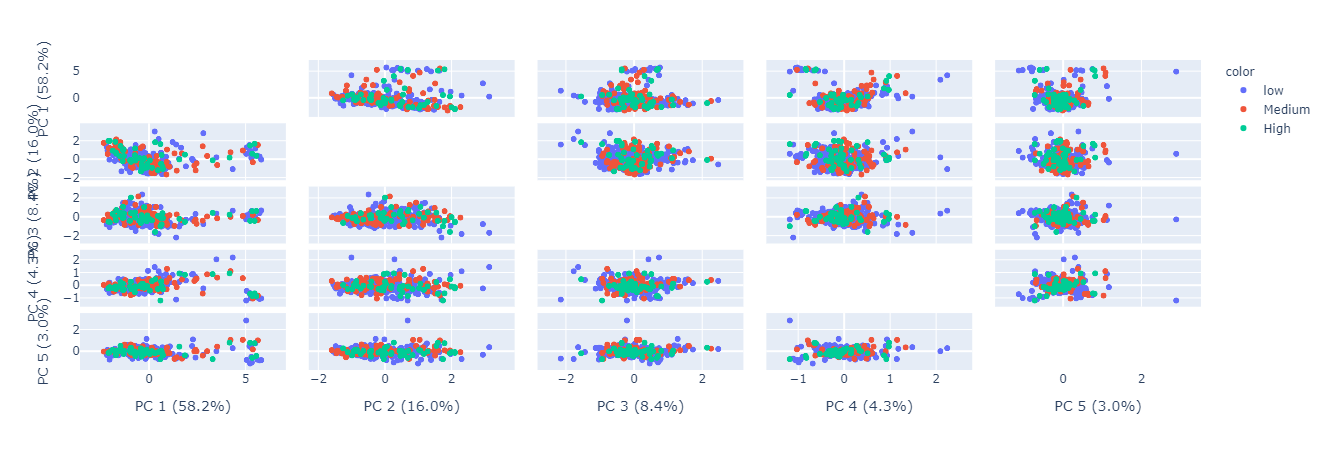

In [88]:
#PCA2 plotting
y2 = raw_nonhealth.iloc[:,0]
rate_label2 = []
low_rate2 = 17.5
medium_rate2 = 24
for i in y2:
    if i <= low_rate:
        rate_label2.append("low")
    if i <= medium_rate and i > low_rate:
        rate_label2.append("Medium")    
    if i > medium_rate:
        rate_label2.append("High")
        
labels2 = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca2.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    nonhealth_pca,
    labels = labels2,
    dimensions = range(5),
    color = rate_label2
)
fig.update_traces(diagonal_visible=False)
fig.show()